In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import spsolve

from FDMethodsSparseMatrix import FD_1d_system_setup

Point 1

Experimental order of convergence when solution is not know a priori. 

Letting $h_2=\theta h_1$, we have

$|| U_{h_2}-U_{h_1} ||_\infty\le || U-U_{h_1} ||_\infty + || U-U_{h_2} ||_\infty\approx C h_1^k+C h_2^k \approx C (1+\theta^k) h_1^k$

Now, given also $h_3 = \theta h_2$, we have similarly

$|| U_{h_3}-U_{h_2} ||_\infty \approx C (1+\theta^k) h_2^k=C (1+\theta^k)\theta^k h_1^k$

hence,

$\frac{|| U_{h_2}-U_{h_1} ||_\infty}{|| U_{h_3}-U_{h_2} ||_\infty}\approx \frac{C (1+\theta^k) h_1^k}{C (1+\theta^k)\theta^k h_1^k}=\theta^{-k}$

from which $k$ can be estimated as before by passing to the logs.

NOTE! The discrete solutions are defined at different sets of points so the above comparison is to be intended on the set of common points!

Finite Difference solver for the reaction-advection-diffusion problem with nonconstant coefficients:

$-\alpha(x) u''(x)+\beta(x) u'(x)+\gamma(x) u(x)=f(x) \quad \in (a,b)=(0, \pi)$

$u(a)=0, \quad u(b)=0$.

Implement FD method including the boundary conditions in the system.

For

$\alpha(x)=1+\sin(x),\,  \beta(x)=1,\, \gamma(x)=x, \, f=1$.

Check that you still get the expected rate of convergence.

In [2]:
# Define the domanin Omega
omega =[0, np.pi]

# Define functions (coefficients)
alpha = lambda x: np.sin(x) + 1
beta = lambda x: np.ones_like(x)
gamma = lambda x: x
f = lambda x: np.ones_like(x)

The idea to show convergence is to run a set of ietrations each time changing N and comparing the actual discrete solution with the previous one and look at the order

In [3]:
n_iter = 6
# Define first number of nodes
N=25
# Define grid (initial)
x =np.linspace(omega[0],omega[1],N+1)

method = FD_1d_system_setup(omega, N, alpha, beta, gamma, f)
A, F = method.FD1D_Hom()
# initial solution discrete
uh=spsolve(A,F)
# k_ratio store
k_array = np.zeros(n_iter)

In [4]:
# Now the actual iterator once the model has been initialized (suppose k = 0.5)
for i in range(1,n_iter):
    N = 2 * N

    method = FD_1d_system_setup(omega, N, alpha, beta, gamma, f)
    A, F = method.FD1D_Hom()    
    uh2=spsolve(A,F)
    # select a point every 2, since it is a point wise comparison, but on same actual x
    uh2_comparison = uh2[0:len(uh2)+1:2]

    k_array[i] = max(abs(uh2_comparison-uh))

    uh = uh2
    


for i in range(2,len(k_array)):
    print(np.log2(k_array[i-1]/k_array[i])/np.log2(2))

1.9877402723882183
1.9958890081814635
1.9992421275144696
1.9997455081020616


The ratio of error evaluated at same position is preserved. It is every time 2.

Point 2

The method FD1D_Non_Hom is the method that implements FD in 1d using sparse matrix with non homogeneous, boundary conditions

Point 3

Consider now the problem defined by:

$a=0$, $b=1$, $u(0)=1$, $u(1)=0$ $f=0$ and

$\alpha=\beta=\gamma=1$.

Solve this problem using a grid made of $N=10$ intervals and plot the solution.

Next, try with $\alpha=0.01$, $\beta=1$, $\gamma=0$. What happens? Experiment by taking finer grids.

In [8]:
# Define the domanin Omega
omega =[0, 1]

# Define functions (coefficients)
alpha = lambda x: np.ones_like(x)
beta = lambda x: np.ones_like(x)
gamma = lambda x: np.ones_like(x)
f = lambda x: np.zeros_like(x)

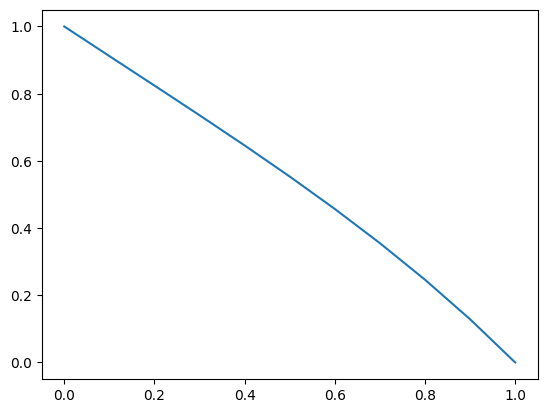

In [9]:
N=10
# Define grid (initial)
x =np.linspace(omega[0],omega[1],N+1)

method = FD_1d_system_setup(omega, N, alpha, beta, gamma, f)
A, F = method.FD1D_Non_Hom(1,0)
# initial solution discrete
uh=spsolve(A,F)

plt.plot(x,uh)

In [13]:
# change the coefficients
# Define the domanin Omega
omega =[0, 1]

# Define functions (coefficients)
alpha = lambda x: np.ones_like(x)*0.01
beta = lambda x: np.ones_like(x)
gamma = lambda x: np.zeros_like(x)
f = lambda x: np.zeros_like(x)

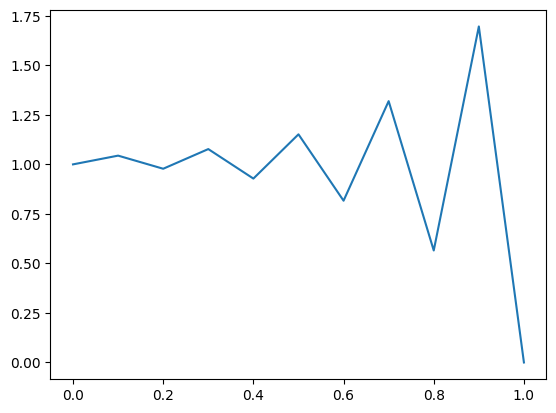

In [ ]:
N=10 
# Define grid (initial)
x =np.linspace(omega[0],omega[1],N+1)

method = FD_1d_system_setup(omega, N, alpha, beta, gamma, f)
A, F = method.FD1D_Non_Hom(1,0)
# initial solution discrete
uh=spsolve(A,F)

plt.plot(x,uh)

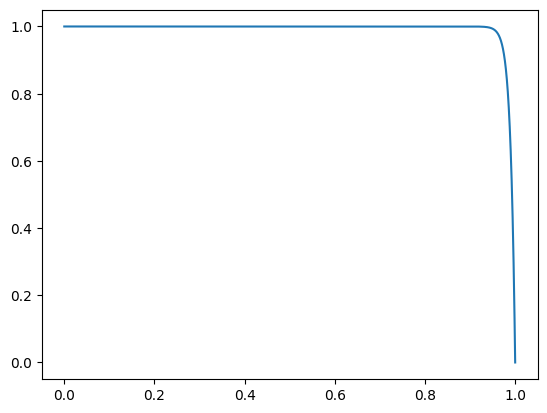

In [16]:
N=100000 # repeat with finer grid
# Define grid (initial)
x =np.linspace(omega[0],omega[1],N+1)

method = FD_1d_system_setup(omega, N, alpha, beta, gamma, f)
A, F = method.FD1D_Non_Hom(1,0)
# initial solution discrete
uh=spsolve(A,F)

plt.plot(x,uh)

The problem is a stability problem. The equation is an elliptic PDE. It is known from theory that for this kind of PDE, the associated method to solve it has to respect a condition to guarantee the stability. Indeed:

$\alpha \geq 0.5*|h|\beta$


Now, $\alpha = 0.01$, $\beta = 1$, so at minimum h shold be 0.5*100 = 50. If it exceeds this threshold no more stability, let's see:

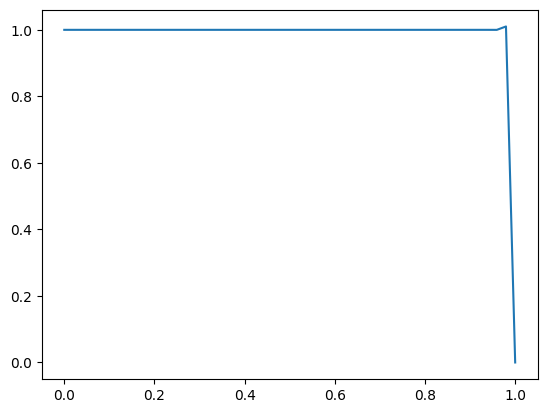

In [23]:
N=49 # repeat with finer grid
# Define grid (initial)
x =np.linspace(omega[0],omega[1],N+1)

method = FD_1d_system_setup(omega, N, alpha, beta, gamma, f)
A, F = method.FD1D_Non_Hom(1,0)
# initial solution discrete
uh=spsolve(A,F)

plt.plot(x,uh)

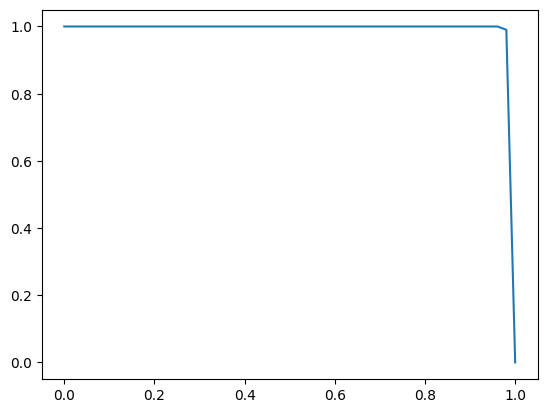

In [24]:
N=51 # repeat with finer grid
# Define grid (initial)
x =np.linspace(omega[0],omega[1],N+1)

method = FD_1d_system_setup(omega, N, alpha, beta, gamma, f)
A, F = method.FD1D_Non_Hom(1,0)
# initial solution discrete
uh=spsolve(A,F)

plt.plot(x,uh)

The differences are very small but intuition of theory is confirmed.